In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/golden_mine.csv')

# Очистка данных
df = df[(df['Profit']<1000000)&(df['Profit']>-1000000)]
for col in df.columns:
    try:
        df[col] = df[col].str.lower()
    except AttributeError:
        pass
# подсчет количества клиентов и средней прибыли
df.agg({'Profit':['count','mean']})

,Profit
count,8713.000000
mean,15755.095834


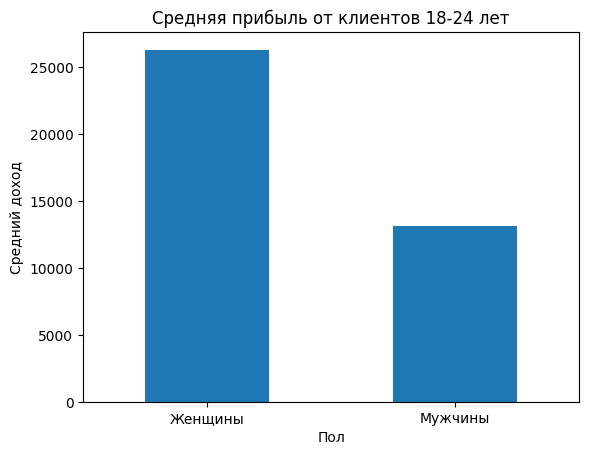

In [ ]:
#построение графиков для синих слайдов
table_meanprof = df[df['AgeGroup'] == '18-24'].groupby(["Gender","AgeGroup"]).agg({'Profit':'mean'})

table_meanprof.plot(kind='bar',xlabel='Пол',ylabel='Средний доход',legend=False).set_xticklabels(['Женщины', 'Мужчины'], rotation=0)
plt.title('Средняя прибыль от клиентов 18-24 лет')
plt.show()

In [ ]:
#красные слайды
#таблица для 6 слайда
import matplotlib.pyplot as plt
table_meanprall = pd.pivot_table(df,values='Profit',index='Gender',columns='AgeGroup', aggfunc='mean')
table_meanprall = table_meanprall.rename(index={'AgeGroup': 'Пол'})
table_meanprall.set_axis(['Row1', 'Row2'], axis=0)


table_meanprall.style.format(precision=0)

AgeGroup,18-24,25-39,40+
Gender,,,
female,26278,7879,-344
male,13156,7928,184


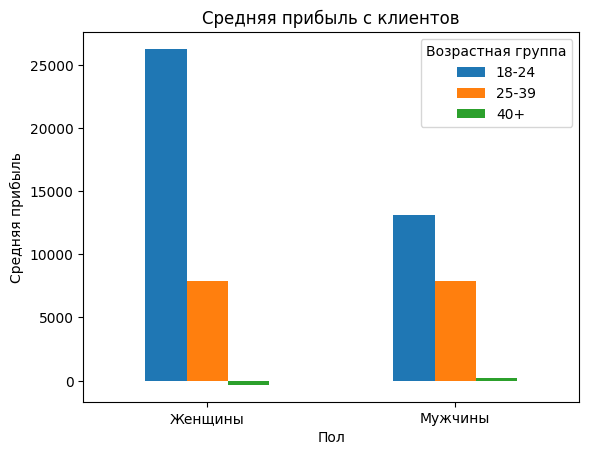

In [ ]:
#красные слайды
#график для 6 слайда
table_meanprall.plot(kind='bar').set_xticklabels(['Женщины', 'Мужчины'], rotation=0)
plt.title('Средняя прибыль с клиентов')
plt.ylabel('Средняя прибыль')
plt.xlabel('Пол')
plt.legend(title = 'Возрастная группа')
plt.show()

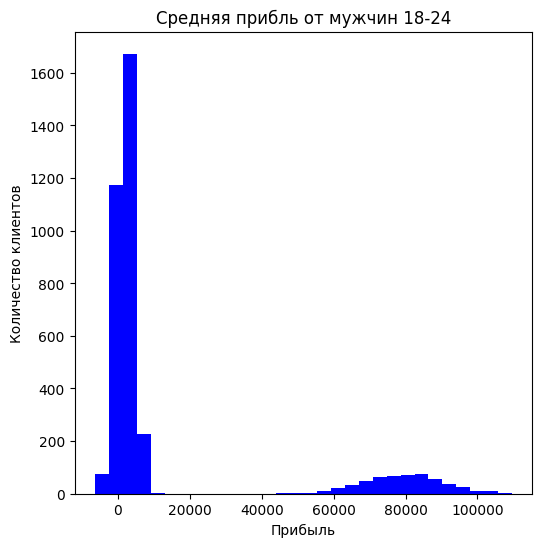

In [ ]:
#черные слайды
#график для 8 слайда

plt.figure(figsize=(13,6))
#формируем датасет только из мужчин 18-24
male = df[(df['Gender'] == 'male') & (df['AgeGroup']=='18-24')]['Profit']
plt.subplot(1, 2, 1)
plt.hist(male, bins=30, color='blue', label="Мужчины")
plt.title('Средняя прибль от мужчин 18-24')
plt.xlabel('Прибыль')
plt.ylabel('Количество клиентов')
plt.show()

<Figure size 1100x600 with 0 Axes>

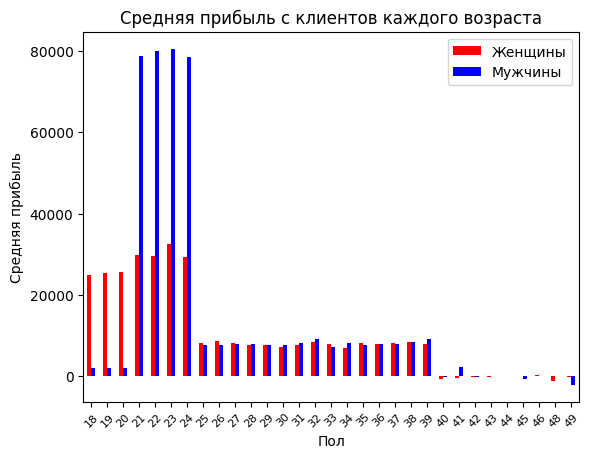

In [ ]:
#черные слайды
#график для 9 слайда
table_profit = pd.pivot_table(df,values='Profit',index='Age',columns='Gender', aggfunc='mean')
plt.figure(figsize=(11,6))
table_profit.plot(kind='bar', color=['red', 'blue'])

plt.xticks(rotation=45)
plt.title('Средняя прибыль с клиентов каждого возраста')
plt.ylabel('Средняя прибыль')
plt.xlabel('Пол')
plt.legend(title = 'Возрастная группа')
plt.tick_params(axis='x', labelsize=8)
plt.legend(['Женщины','Мужчины' ])
plt.show()


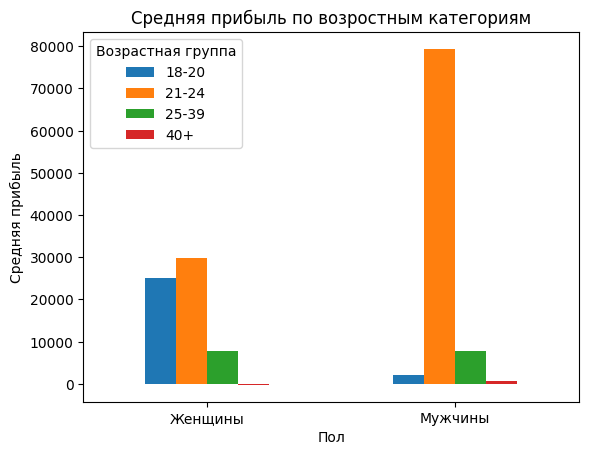

In [ ]:
def categorize_age(age):
  if 18<=age<=20:
    return '18-20'
  elif 21<=age<=24:
    return '21-24'
  elif 25<=age<=40:
    return '25-39'
  elif 40<=age:
    return '40+'


df_2 = df

df_2['AgeGroup'] = df_2['Age'].apply(lambda x: categorize_age(x))

table_profit = pd.pivot_table(df,values='Profit',index='Gender',columns='AgeGroup', aggfunc='mean')
table_profit.plot(kind='bar',xlabel = 'Пол', ylabel = 'Средняя прибыль').set_xticklabels(['Женщины', 'Мужчины'], rotation=0)
plt.legend(loc='upper left',title = 'Возрастная группа')
plt.title('Средняя прибыль по возростным категориям')
plt.show()


table_meanprall = pd.pivot_table(df,values='Profit',index='Gender',columns='AgeGroup', aggfunc=['mean','count'])
table_meanprall = table_meanprall.rename(index={'AgeGroup': 'Пол'})
table_meanprall.set_axis(['Row1', 'Row2'], axis=0)


table_meanprall.transpose().style.format(precision=0)